In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base=automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station=base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the row's columns and data in dictionary format

first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a0aedc9248>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [11]:
# Display the row's columns and data in dictionary format

first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a0aeda1d88>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

# Find Max Date of dataset using orderby descending
precip=session.query(measurement.date,measurement.prcp).\
    order_by(measurement.date.desc()).all()

precip

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [13]:
# Display of precipitation from only the last year

twelvemonths="2016,08,23"

lastyear=session.query(measurement.date,measurement.prcp).\
    filter(func.strftime("%Y,%m,%d",measurement.date)>=twelvemonths).all()

lastyear

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(lastyear, columns=['date','prcp'])
index=df.set_index('date', inplace=True)
index

In [15]:
# Sort the dataframe by date

sortdf = pd.DataFrame(lastyear, columns=['date','prcp'])
sortdf=sortdf.sort_values(['date'],ascending=True)

# Drop NAN values
sortdf.dropna(how='any')

,date,prcp
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


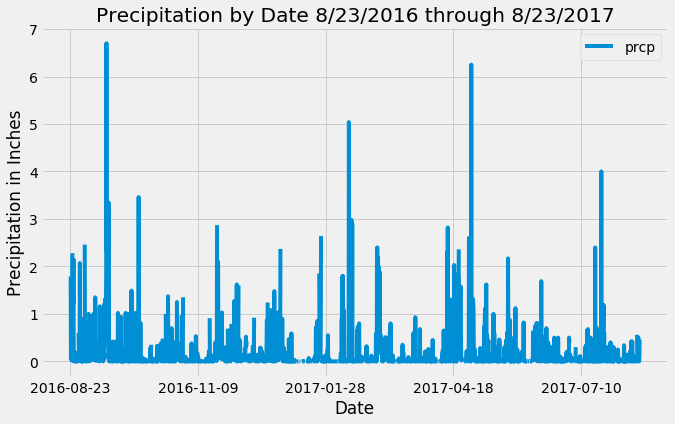

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

sortdf.plot('date','prcp',figsize=(10,6))
plt.xlabel('Date')
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation by Date 8/23/2016 through 8/23/2017")
plt.tight_layout
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sortdf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
stationcount=session.query(func.count(station.station)).all()
stationcount

[(9)]

In [19]:
# Create dataframe for precipitation data needed for next analysis

allprecip=session.query(measurement.station,measurement.date,measurement.prcp,measurement.tobs)
precip_df=pd.DataFrame(allprecip,columns=['station','date','prcp','tobs'])
precip_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [20]:
# Create dataframe for station data needed for next analysis

allstations=session.query(station.station,station.name,station.id)
allstations_df=pd.DataFrame(allstations,columns=['station','name','id'])
allstations_df

,station,name,id
0,USC00519397,"WAIKIKI 717.2, HI US",1
1,USC00513117,"KANEOHE 838.1, HI US",2
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",3
3,USC00517948,"PEARL CITY, HI US",4
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",5
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",6
6,USC00519281,"WAIHEE 837.5, HI US",7
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",8
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",9


In [21]:
# Merge dataframes

merge_df=pd.merge(precip_df,allstations_df,on="station")
merge_df

,station,date,prcp,tobs,name,id
0,USC00519397,2010-01-01,0.08,65.0,"WAIKIKI 717.2, HI US",1
1,USC00519397,2010-01-02,0.00,63.0,"WAIKIKI 717.2, HI US",1
2,USC00519397,2010-01-03,0.00,74.0,"WAIKIKI 717.2, HI US",1
3,USC00519397,2010-01-04,0.00,76.0,"WAIKIKI 717.2, HI US",1
4,USC00519397,2010-01-06,NaN,73.0,"WAIKIKI 717.2, HI US",1
...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,"MANOA LYON ARBO 785.2, HI US",9
19546,USC00516128,2017-08-20,NaN,78.0,"MANOA LYON ARBO 785.2, HI US",9
19547,USC00516128,2017-08-21,0.56,76.0,"MANOA LYON ARBO 785.2, HI US",9
19548,USC00516128,2017-08-22,0.50,76.0,"MANOA LYON ARBO 785.2, HI US",9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

group_df=merge_df[['station','id']]

group=group_df.groupby(['station']).count()
group

sorted_df=group.sort_values(['id'],ascending=False)
sorted_df

,id
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Create new dataframe with only data needed for this analysis
temp=merge_df[['id','tobs','station']]

# Calculate min, max, mean

lowesttemp=temp.loc[(temp['station']=='USC00519281')]
lowesttemp_min=lowesttemp['tobs'].min()
lowesttemp_max=lowesttemp['tobs'].max()
lowesttemp_avg=lowesttemp['tobs'].mean()

# Create dataframe to display min, max, mean and hide the index

analysis=pd.DataFrame({"Minimum Temp":[lowesttemp_min],"Maximum Temp":[lowesttemp_max],"Average Temp":[lowesttemp_avg]})
analysis
analysis.style.hide_index()

Minimum Temp,Maximum Temp,Average Temp
54.000000,85.000000,71.663781


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A0B0D83EC8>]],
      dtype=object)

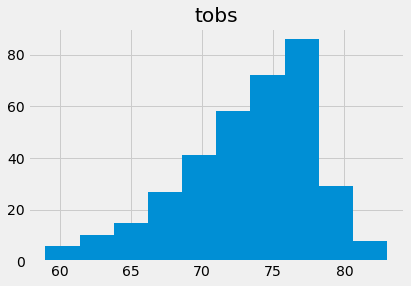

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Create new dataframe with only data needed for the histogram

highest_no=merge_df[['date','tobs','station']]

# Filter for last year of data for specific station

lstyr=highest_no.loc[(highest_no['date']>='2016-08-23')&(highest_no['station']=='USC00519281')]

lstyr.hist(column='tobs')

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
